In [1]:
__author__ = "Lisette Espin"
__copyright__ = "Copyright 2020, GESIS"
__credits__ = ["Lisette Espin-Noboa", 
               "Fariba Karimi",                
               "Claudia Wagner",
               "Markus Strohmaier"]
__license__ = "GPL"
__version__ = "1.0.1"
__maintainer__ = "Lisette Espin"
__email__ = "lisette.espin@gesis.org"
__status__ = "Development"

In [2]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2
%pylab inline

import os
from org.gesis.lib import io
from org.gesis.lib import viz
from org.gesis.lib import paper

Populating the interactive namespace from numpy and matplotlib


/ssd/lespin/virtualenv/python3.5/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['__version__']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
ROOT = 'results/'
MODEL = 'DBAH'                                                     # main model
MODELS = ["Random","SBM","DBA","DH","DBAH"]                        # all models (Null)
MODELS_H = [m for m in MODELS if m not in ['Null','Random','DBA']] # models that rely on homophily
MARKERS = ["*","_","x","v","."] #"|"
QTYPE = {'mae':'qae', 'me':'qe'}                                   # quadrant type (based on horizontal ineq. metric)
SMOOTH = 0.05                                                      # smooth for quadrant assignment
METRICS = ['pagerank', 'wtf'] #'indegree','outdegree',
DATASETS = ['aps','blogs','seventh','hate','wikipedia']

PLOTS = os.path.join(ROOT, 'plots')

<h2>Data</h2>

In [4]:
df_node_metadata_empirical = paper.load_node_metadata(os.path.join(ROOT,'empirical'))
df_network_metadata_empirical = paper.load_network_metadata(os.path.join(ROOT,'empirical'))
df_rank_empirical = paper.load_rank(os.path.join(ROOT,'empirical'), df_network_metadata_empirical, SMOOTH)

In [5]:
df_rank_fit = paper.load_rank_all_models(os.path.join(ROOT,'fit'), MODELS, SMOOTH)

In [6]:
df_rank_synthetic = paper.load_rank_synthetic_all_models(os.path.join(ROOT,'synthetic'), MODELS, SMOOTH)

<h1>Vertical vs. Horizontal Inequalities</h1>

<h2>1. Synthetic networks</h2>

In [7]:
metric = 'pagerank'
vtype = 'me'
mean = True

<h3>OLS Linear Regression</h3>

In [8]:
OLS_data = paper.OLS_prepare_data(df_rank_synthetic, MODEL, mean)
summary, bestmodel = paper.OLS_best_model(OLS_data)

In [9]:
fn = os.path.join(ROOT, "vh_ineq_OLS{}.tex".format('_mean' if mean else ''))
io.save_text(summary.as_latex(), fn)
summary

2020-09-09 02:30:10	results/vh_ineq_OLS_mean.tex saved!


,Model 1,Model 2,Model 3,Model 4,Model 5
Intercept,0.786***,0.698***,0.719***,0.723***,0.728***
,(0.002),(0.001),(0.001),(0.001),(0.002)
pw,-0.215***,-0.197***,-0.197***,-0.196***,-0.197***
,(0.003),(0.001),(0.001),(0.001),(0.001)
mae,,0.323***,0.328***,0.334***,0.327***
,,(0.003),(0.003),(0.003),(0.003)
fm,,,-0.075***,-0.075***,-0.075***
,,,(0.003),(0.003),(0.003)
hmm,,,,-0.010***,-0.008***
,,,,(0.001),(0.001)


results/plots/vh_ineq_me_OLS.pdf saved!


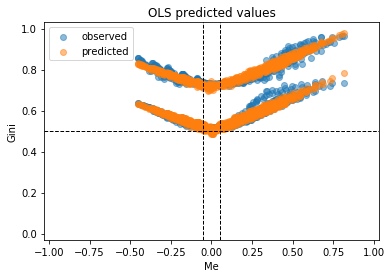

In [10]:
fn = os.path.join(PLOTS, "vh_ineq_{}_OLS.pdf".format(vtype))
viz.OLS_observed_predicted(OLS_data, bestmodel, SMOOTH, x=vtype, fn=fn)

<h3>Vertical and Horizontal Inequalities per Top-k rank</h3>
<p>Gini Coefficient vs. MAE Fraction of minorities in each top-k rank</p>

/ssd/lespin/virtualenv/python3.5/lib/python3.5/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


results/plots/vh_ineq_topk_pagerank_DBAH_qe.pdf saved!


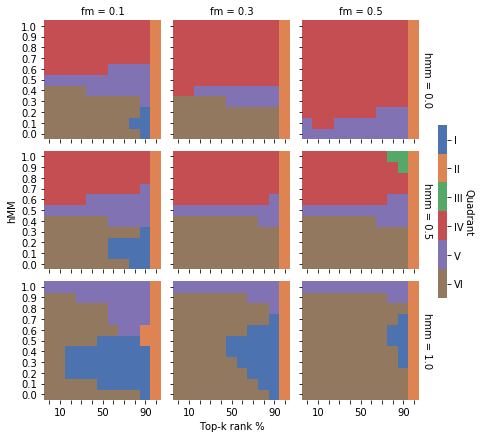

In [11]:
model = MODEL
qtype = QTYPE[vtype]
fn = os.path.join(PLOTS, "vh_ineq_topk_{}_{}_{}.pdf".format(metric, model, qtype))
viz.plot_synthetic_quadrante(df_rank_synthetic, qtype=qtype, model=model, metric=metric, all=False, fn=fn)

<h3>Overall Vertical and Horizontal Inequalities</h3>
<p>Gini Coefficient vs. MAE Fraction of minorities across top-k ranks</p>

results/plots/vh_ineq_me_pagerank_mean.pdf saved!


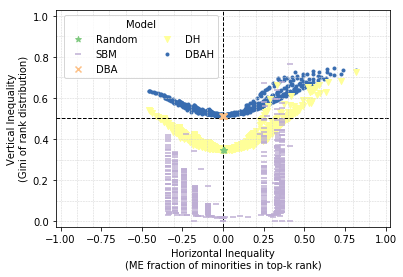

In [12]:
fn = os.path.join(PLOTS, "vh_ineq_{}_{}_{}.pdf".format(vtype, metric, 'mean' if mean else 'all'))
viz.plot_inequalities(df_rank_synthetic, MODELS, MARKERS, vtype=vtype, mean=mean, metric=metric, fn=fn)

<h3>Effects of homophily and group size</h3>

results/plots/vh_ineq_me_pagerank_DBAH_mean.pdf saved!


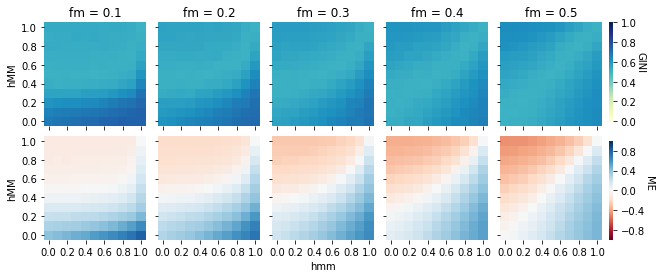

In [13]:
fn = os.path.join(PLOTS, "vh_ineq_{}_{}_{}_mean.pdf".format(vtype,metric,MODEL))
viz.plot_inequalities_simplified_by_model(df_rank_synthetic, model=MODEL, metric=metric, vtype=vtype, fn=fn)

<h2>2. Empirical networks</h2>

In [14]:
df_best_fit = paper.best_fit(df_rank_fit, df_rank_empirical, datasets=DATASETS, models=MODELS, vtype=vtype)
df_best_fit.pivot_table(index='dataset', columns='metric', values='kind', aggfunc=np.unique)

metric,indegree,outdegree,pagerank,wtf
dataset,,,,
aps,DBAH,DBA,DBA,DBA
blogs,DBA,Random,DBAH,DBAH
hate,DBAH,DBAH,DBA,DBAH
seventh,DBAH,DBA,DH,Random
wikipedia,DBAH,DH,DBA,SBM


results/plots/vh_ineq_me_best_fit_mean.pdf saved!


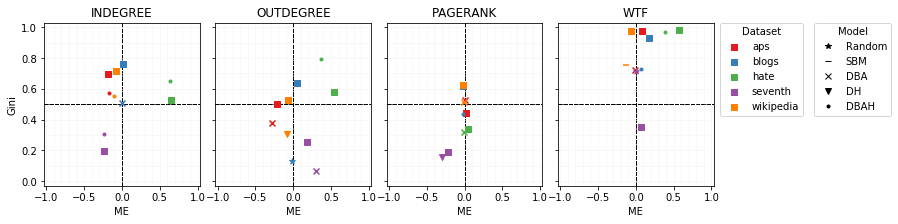

In [15]:
fn = os.path.join(PLOTS, "vh_ineq_{}_best_fit_mean.pdf".format(vtype))
viz.plot_inequalities_fit_improved(df_best_fit, df_rank_empirical, 
                                   models=MODELS, markers=MARKERS, 
                                   valid_metrics=None, 
                                   vtype=vtype, fn=fn)